In [1]:
import pmlb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The features of the dataset are: RIDGE, NUB, CRACK, WEIGHT, target
first five rows of the dataset:
    RIDGE     NUB   CRACK   WEIGHT   target
0 -2.3482  3.6314  5.0289  10.8721  -1.3852
1 -1.1520  1.4805  3.2375  -0.5939   2.1235
2 -2.5245 -6.8633 -2.8037   8.4631  -3.4126
3  5.7523 -6.5091 -5.1510   4.3480 -10.3261
4  8.7494 -3.8978 -1.3834 -14.8776  -2.4153
The scales of the features are:
RIDGE      6.398237
NUB        5.186311
CRACK      7.875199
WEIGHT    10.043092
target     3.144395
dtype: float64
The variance of the features are:
RIDGE      40.937431
NUB        26.897817
CRACK      62.018757
WEIGHT    100.863690
target      9.887217
dtype: float64


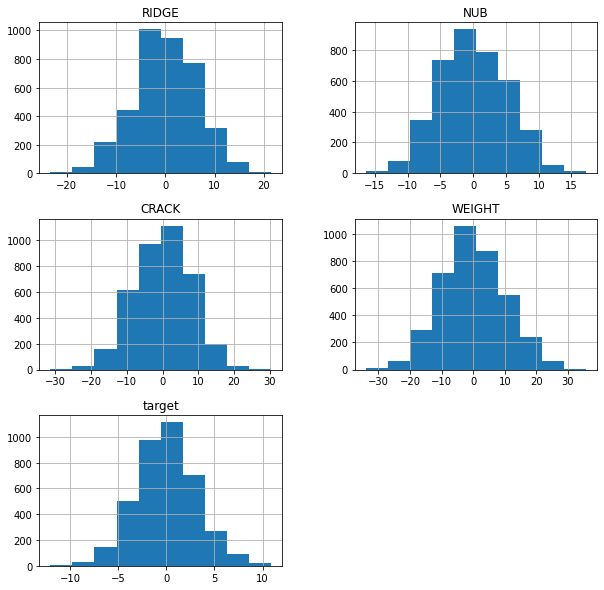

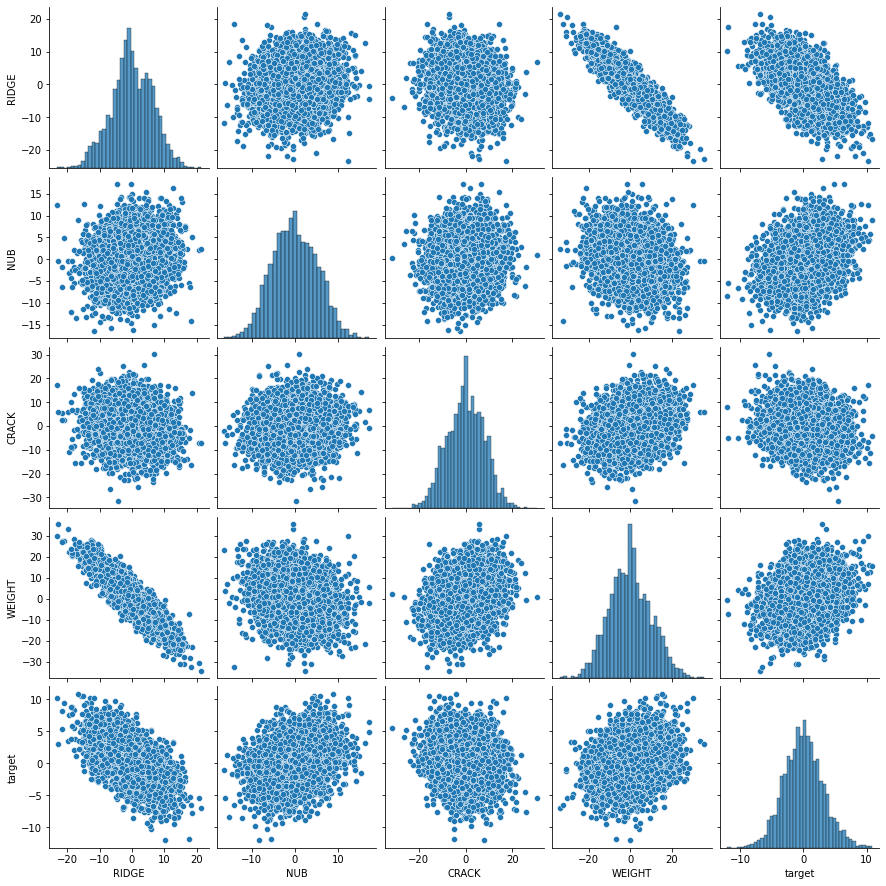

,RIDGE,NUB,CRACK,WEIGHT,target
0,-2.3482,3.6314,5.028900,10.8721,-1.3852
1,-1.1520,1.4805,3.237500,-0.5939,2.1235
2,-2.5245,-6.8633,-2.803700,8.4631,-3.4126
3,5.7523,-6.5091,-5.151000,4.3480,-10.3261
4,8.7494,-3.8978,-1.383400,-14.8776,-2.4153
...,...,...,...,...,...
3843,-11.1764,-3.1833,-0.194100,6.8507,8.5044
3844,4.8725,-1.5653,-1.354000,-13.8886,2.1865
3845,6.3814,4.3648,-22.422899,-19.1334,1.8819
3846,2.7014,-3.8759,-7.262700,-6.2986,-0.4284


In [10]:
df = pmlb.fetch_data('529_pollen')

print(f"The features of the dataset are: {', '.join(df.columns)}")

print("first five rows of the dataset:")
print(df.head())

print("The scales of the features are:")
print(df.std())

print("The variance of the features are:")
print(df.var())

df.hist(figsize=(10, 10))
plt.show()

sns.pairplot(df)
plt.show()

In [3]:
print("summary statistics of the dataset:")
print(df.describe())

summary statistics of the dataset:
             RIDGE          NUB        CRACK       WEIGHT       target
count  3848.000000  3848.000000  3848.000000  3848.000000  3848.000000
mean     -0.003637     0.000160     0.003103     0.004237     0.000166
std       6.398237     5.186311     7.875199    10.043092     3.144395
min     -23.283899   -16.393499   -31.413000   -34.035198   -12.039100
25%      -3.983725    -3.757625    -5.453275    -7.018650    -2.132450
50%      -0.163850    -0.231700    -0.056150    -0.149350    -0.030450
75%       4.647150     3.750525     5.661125     6.799800     2.028625
max      21.406601    17.258301    30.317801    35.802799    10.867300


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [5]:
X, y = df.drop("target", axis=1), df['target']

maen_list = []

for r in range(1, 10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=r/10, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    maen_list.append(mae)

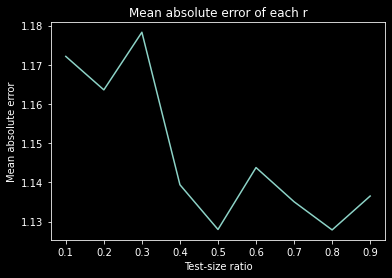

In [11]:
plt.style.use('dark_background')
plt.plot([r/10 for r in range(1, 10)], maen_list)
plt.xlabel("Test-size ratio")
plt.ylabel("Mean absolute error")
plt.title("Mean absolute error of each r")
plt.show()

In [7]:
import itertools

In [8]:
def features_selection(k):
    results = []
    for features in itertools.combinations(X.columns, k):
        X_train_k = X_train[list(features)]
        X_test_k = X_test[list(features)]
        model = LinearRegression()
        model.fit(X_train_k, y_train)
        y_pred = model.predict(X_test_k)
        mae = mean_absolute_error(y_test, y_pred)
        results.append((features, mae))
    print(f"For k = {k}:")
    for features, mae in results:
        print(f"Features: {', '.join(features)}, MAE: {mae}")

In [9]:
features_selection(2)
features_selection(3)

For k = 2:
Features: RIDGE, NUB, MAE: 1.823227844546272
Features: RIDGE, CRACK, MAE: 2.0245479600239404
Features: RIDGE, WEIGHT, MAE: 1.4490528454599154
Features: NUB, CRACK, MAE: 2.3189887991252647
Features: NUB, WEIGHT, MAE: 2.2510207818961048
Features: CRACK, WEIGHT, MAE: 2.372089386836629
For k = 3:
Features: RIDGE, NUB, CRACK, MAE: 1.6921667694778668
Features: RIDGE, NUB, WEIGHT, MAE: 1.1457428117945077
Features: RIDGE, CRACK, WEIGHT, MAE: 1.4512163540720957
Features: NUB, CRACK, WEIGHT, MAE: 2.147797505547066
